# Homework Transforming, Visualization and EDA

## Tugas:
Try to answer these following questions using visualization in Python. 
Dataset used to answer the following questions in "E-commerce_data_clean.csv"


1. Which Months generate the highest Order and Revenue?
2. Which Day of a week generate the highest Order and Revenue?
3. Which hour the most Order are made?
4. Which Date contributes the highest revenue?
5. How does each country contributes to the revenue? is there any patterns?
6. How does the Discount influence the business performance?

## Jawaban:

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Import dataset
data = pd.read_csv('E-commerce_data_clean.csv')
data

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
406825,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
406826,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60
406827,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60


In [4]:
# Identify data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   Date         406829 non-null  object 
 3   Years        406829 non-null  int64  
 4   Months       406829 non-null  int64  
 5   Days         406829 non-null  int64  
 6   Hours        406829 non-null  int64  
 7   DayOfMonth   406829 non-null  int64  
 8   StockCode    406829 non-null  object 
 9   Description  406829 non-null  object 
 10  Quantity     406829 non-null  int64  
 11  UnitPrice    406829 non-null  float64
 12  CustomerID   406829 non-null  int64  
 13  Country      406829 non-null  object 
 14  TotalCost    406829 non-null  float64
dtypes: float64(2), int64(7), object(6)
memory usage: 46.6+ MB


In [5]:
# Check null data
data.isna().sum()

InvoiceNo      0
InvoiceDate    0
Date           0
Years          0
Months         0
Days           0
Hours          0
DayOfMonth     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
TotalCost      0
dtype: int64

## 1. Which Months generate the highest Order and Revenue?`
Jawaban adalah bulan ke 11 atau November

In [75]:
# Create variable groupby for Months with InvoiceNo (count) as Order and Total Cost parameter (sum) as Revenue. Then Sort values from largest to smallest (highest)
data.groupby(['Months']).agg({'InvoiceNo' : 'count', 'TotalCost' : 'sum'}).sort_values(['InvoiceNo', 'TotalCost'], ascending=[False, False]).head(1)

,InvoiceNo,TotalCost
Months,,
11,65598,1132407.74


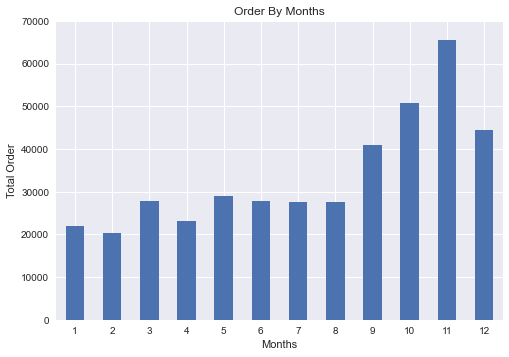

In [53]:
# Visualize Order every Months
ordermonths = data.groupby('Months').count()
x = ordermonths['InvoiceNo']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Order By Months')
plt.ylabel('Total Order')
plt.ylim([0, 70000]) #range limit for y
plt.show()

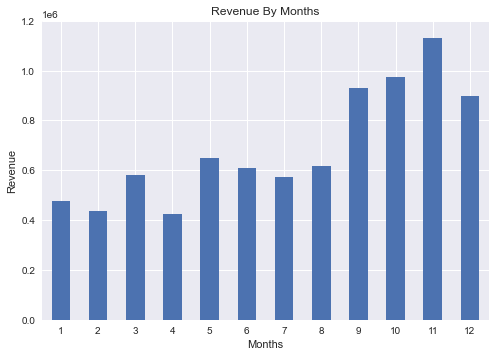

In [50]:
# Visualize Revenue every Months
totalcostmonths = data.groupby('Months').sum()
x = totalcostmonths['TotalCost']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Revenue By Months')
plt.ylabel('Revenue')
plt.ylim([0, 1200000]) #range limit for y
plt.show()

## 2. Which Day of a week generate the highest Order and Revenue?
Jawaban adalah hari 4

In [73]:
# Create variable groupby for Day (day of a week) with InvoiceNo (count) as Order and Total Cost parameter (sum) as Revenue. Then Sort values from largest to smallest (highest)
data.groupby(['Days']).agg({'InvoiceNo' : 'count', 'TotalCost' : 'sum'}).sort_values(['InvoiceNo', 'TotalCost'], ascending=[False, False]).head(1)

,InvoiceNo,TotalCost
Days,,
4,82374,1906108.19


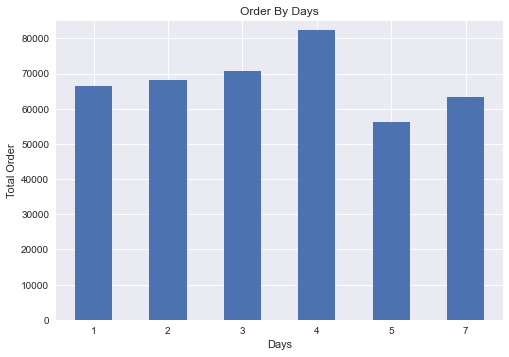

In [74]:
# Visualize Order every Days
orderdays = data.groupby('Days').count()
x = orderdays['InvoiceNo']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Order By Days')
plt.ylabel('Total Order')
plt.ylim([0, 85000]) #range limit for y
plt.show()

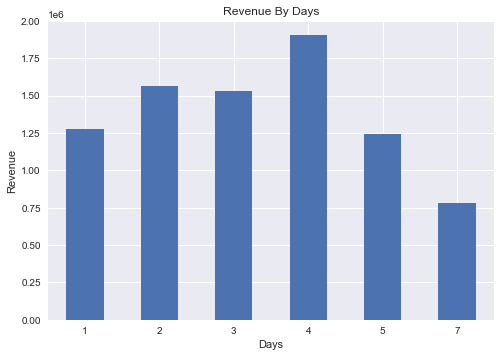

In [60]:
# Visualize Revenue every Months
totalcostdays = data.groupby('Days').sum()
x = totalcostdays['TotalCost']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Revenue By Days')
plt.ylabel('Revenue')
plt.ylim([0, 2000000]) #range limit for y
plt.show()

## 3. Which hour the most Order are made?
Jawaban adalah jam 12

In [72]:
# Create variable groupby for Hours with InvoiceNo (count) as Order. Then Sort values from largest to smallest (highest)
data.groupby(['Hours']).agg({'InvoiceNo' : 'count'}).sort_values(['InvoiceNo'], ascending=[False]).head(1)

,InvoiceNo
Hours,
12,73342


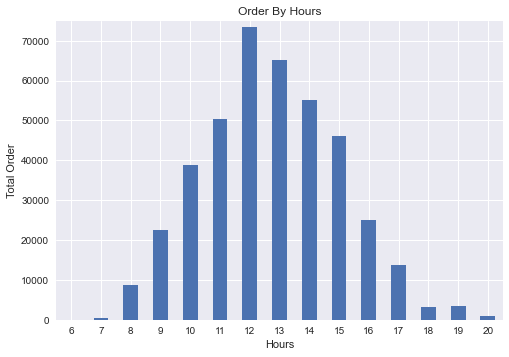

In [66]:
# Visualize Order every Hours
orderhours = data.groupby('Hours').count()
x = orderhours['InvoiceNo']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Order By Hours')
plt.ylabel('Total Order')
plt.ylim([0, 75000]) #range limit for y
plt.show()

## 4. Which Date contributes the highest revenue?
Jawaban adalah pada tanggal 20 September 2011 (2011-09-20)

In [71]:
# Create variable groupby for Date with Total Cost (sum) as Revenue. Then Sort values from largest to smallest (highest)
data.groupby(['Date']).agg({'TotalCost' : 'sum'}).sort_values(['TotalCost'], ascending=[False]).head(1)

,TotalCost
Date,
2011-09-20,103385.26


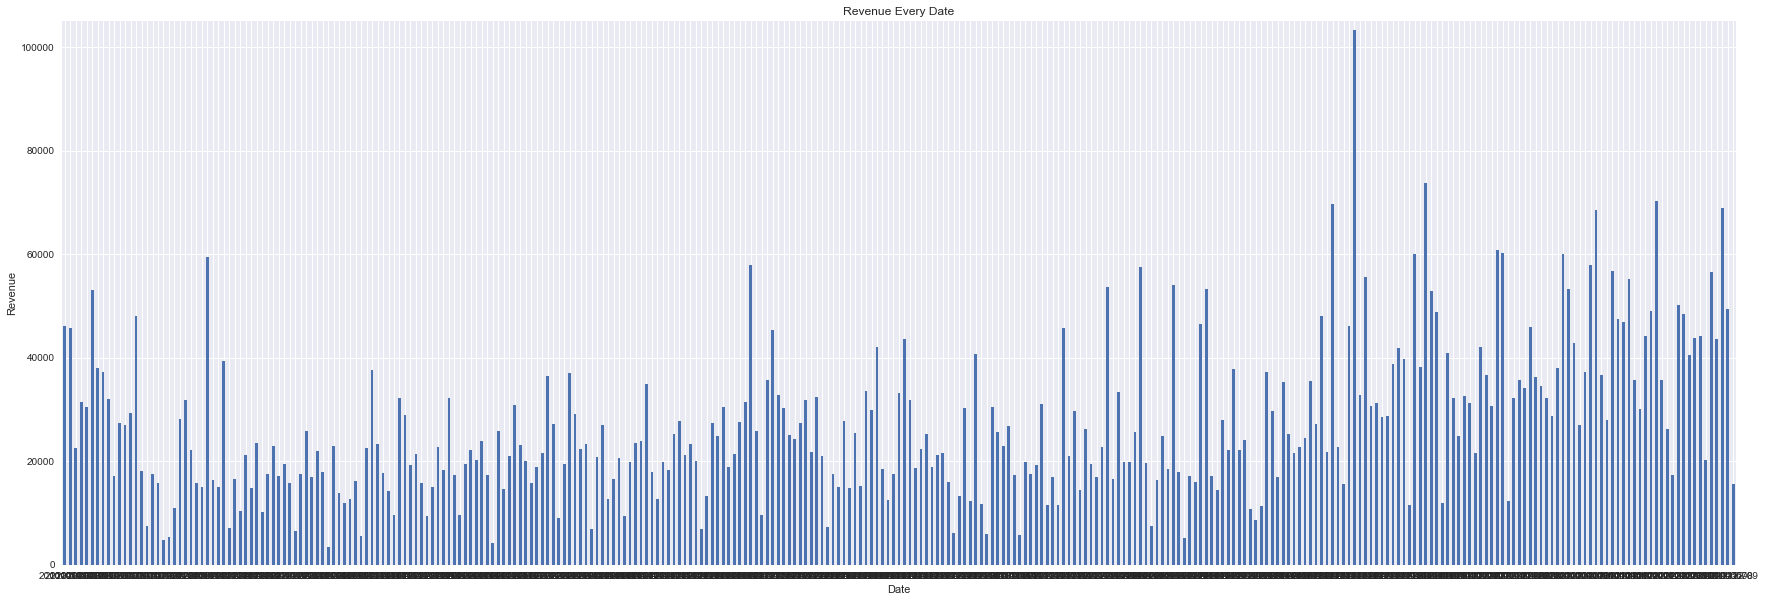

In [86]:
# Visualize Revenue every Date
plt.figure(figsize=(30, 10))
totalcostdate = data.groupby('Date').sum()
x = totalcostdate['TotalCost']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Revenue Every Date')
plt.ylabel('Revenue')
plt.ylim([0, 105000]) #range limit for y
plt.show()

## 5. How does each country contributes to the revenue? is there any patterns?
Jawaban adalah There are no patterns revenue every country, because data show every country have very large difference revenue. The highest revenue is United Kingdom with revenue 6.767873e+06, but the smallest revenue is Saudi Arabia with revenue 1.311700e+02. Country can contribute revenue in E-Commerce depends on several parameters like E-commerce regulation, public income, technology advances, etc. Dataset did not mention about that several parameters.

In [85]:
# Create variable groupby for Country with Total Cost (sum) as Revenue. Then Sort values from largest to smallest.
data.groupby(['Country']).agg({'TotalCost' : 'sum'}).sort_values(['TotalCost'], ascending=[False])

,TotalCost
Country,
United Kingdom,6.767873e+06
Netherlands,2.846615e+05
EIRE,2.502852e+05
Germany,2.216982e+05
France,1.967128e+05
Australia,1.370773e+05
Switzerland,5.573940e+04
Spain,5.477458e+04
Belgium,4.091096e+04


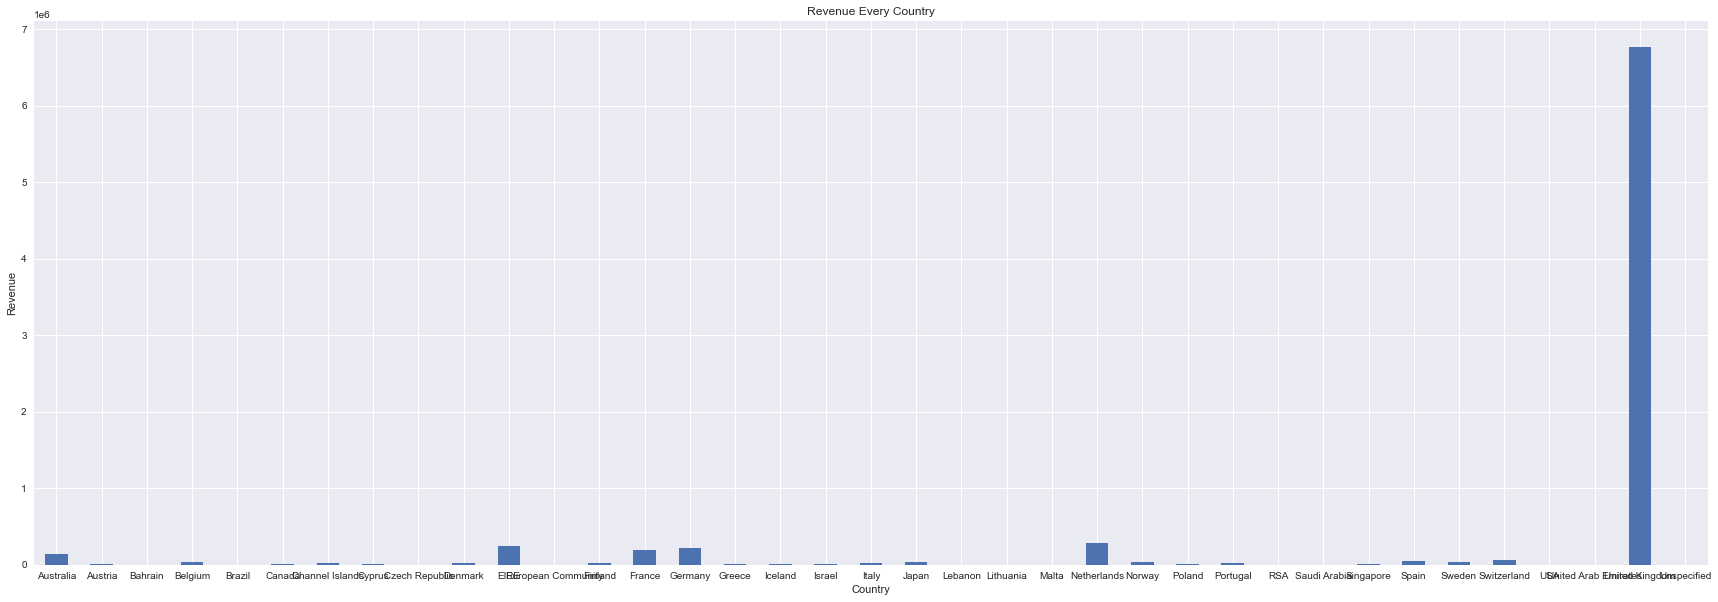

In [88]:
# Visualize Revenue every Country
plt.figure(figsize=(30, 10))
totalcostcountry = data.groupby('Country').sum()
x = totalcostcountry['TotalCost']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Revenue Every Country')
plt.ylabel('Revenue')
plt.show()

## 6. How does the Discount influence the business performance?
Jawaban adalah basicly discount can influence the business performance because discount can make buyers want to buy the product with cheaper price. Of Course with the right discount strategy. This dataset show us every quantity with discounted product have minus quantity. This case can make Revenue (TotalCost) value minus too.

In [136]:
#Create variable and show discount data
datadiscount = data[data['Description'] == 'Discount']
datadiscount

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
141,C536379,2010-12-01 09:41:00,2010-12-01,2010,12,3,9,1,D,Discount,-1,27.50,14527,United Kingdom,-27.50
6748,C537164,2010-12-05 13:21:00,2010-12-05,2010,12,7,13,5,D,Discount,-1,29.29,14527,United Kingdom,-29.29
10234,C537597,2010-12-07 12:34:00,2010-12-07,2010,12,2,12,7,D,Discount,-1,281.00,15498,United Kingdom,-281.00
12760,C537857,2010-12-08 16:00:00,2010-12-08,2010,12,3,16,8,D,Discount,-1,267.12,17340,United Kingdom,-267.12
20712,C538897,2010-12-15 09:14:00,2010-12-15,2010,12,3,9,15,D,Discount,-1,5.76,16422,United Kingdom,-5.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361537,C577227,2011-11-18 12:06:00,2011-11-18,2011,11,5,12,18,D,Discount,-1,19.82,14527,United Kingdom,-19.82
361538,C577227,2011-11-18 12:06:00,2011-11-18,2011,11,5,12,18,D,Discount,-1,16.76,14527,United Kingdom,-16.76
372543,C578239,2011-11-23 12:29:00,2011-11-23,2011,11,3,12,23,D,Discount,-1,26.33,14912,Italy,-26.33
389005,C579884,2011-11-30 17:34:00,2011-11-30,2011,11,3,17,30,D,Discount,-1,20.53,14527,United Kingdom,-20.53


In [137]:
# Revenue vs Discount. True with discount, False without discount.
discount = data.groupby([data['Description'] == 'Discount']).agg({'TotalCost' : 'sum'}).sort_values('TotalCost', ascending=True)
discount

,TotalCost
Description,
True,-5.696220e+03
False,8.305762e+06


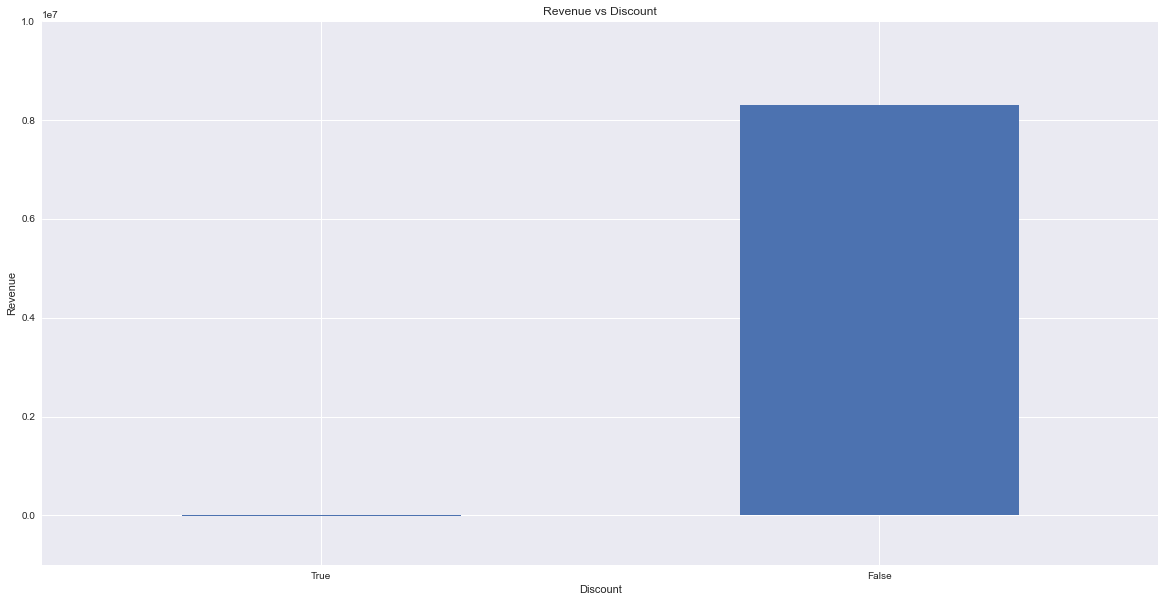

In [145]:
# Visualize Revenue with and without discount. True with discount, False without discount.
plt.figure(figsize=(20, 10))
x = discount['TotalCost']
plt.style.use('seaborn')
x.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Revenue vs Discount')
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.ylim([-1000000, 10000000]) #range limit for y
plt.show()